# Ensemble Methods 

Ensemble methods are machine learning techniques that combine multiple models (often referred to as "weak learners") to create a stronger predictive model. They aim to improve the accuracy and robustness of predictions by leveraging the strengths of individual models while mitigating their weaknesses.

---

## Types of Ensemble Methods

1. **Bagging (Bootstrap Aggregating)**:
   - Reduces variance by training multiple models on different subsets of the data and averaging their predictions (for regression) or using majority voting (for classification).
   - Example: Random Forest.

2. **Boosting**:
   - Reduces bias by sequentially training models, where each model tries to correct the errors of its predecessor.
   - Example: Gradient Boosting, AdaBoost.

3. **Stacking**:
   - Combines predictions from multiple models using another model (meta-learner) to make the final prediction.

---

## Boosting

Boosting is a sequential ensemble technique where models are trained iteratively to correct the errors of the previous models. It focuses on difficult-to-predict data points, giving more weight to them in subsequent iterations.

### How Boosting Works

1. **Initialization**:
   - Start with a weak learner (e.g., a shallow decision tree).
   - Assign equal weights to all training samples.

2. **Iterative Model Building**:
   - Train a model on the training data.
   - Identify misclassified samples and increase their weights (or residual errors in regression).
   - Train the next model to focus on these errors.

3. **Final Prediction**:
   - Combine the predictions of all models, typically using weighted voting (classification) or weighted average (regression).

---

### Popular Boosting Algorithms

1. **AdaBoost (Adaptive Boosting)**:
   - Focuses on misclassified samples by adjusting their weights.
   - Combines predictions using weighted majority voting.

   **Mathematical Summary**:
   - Weight update for a sample: \( w_i^{(t+1)} = w_i^{(t)} \cdot e^{\alpha_t \cdot \text{error}(x_i)} \)
   - Final prediction: \( \text{sign} \left( \sum_{t} \alpha_t \cdot h_t(x) \right) \)

2. **Gradient Boosting**:
   - Uses gradient descent to minimize the loss function.
   - Fits new models to the residuals (errors) of previous models.

   **Steps**:
   - Initialize a base model with a prediction (e.g., the mean for regression).
   - Fit subsequent models on the residuals.
   - Combine all models’ predictions to reduce errors.

3. **XGBoost**:
   - An optimized version of Gradient Boosting.
   - Features include regularization, parallel computation, and handling of missing values.

4. **LightGBM**:
   - Boosting algorithm optimized for speed and efficiency.
   - Uses histogram-based techniques to reduce computation time.

5. **CatBoost**:
   - Specifically designed to handle categorical features effectively.
   - Avoids the need for extensive preprocessing (like one-hot encoding).

---

### Advantages of Boosting

- **High Accuracy**: Boosting often outperforms other algorithms in competitions and real-world applications.
- **Flexibility**: Can be applied to various types of data and tasks.
- **Feature Selection**: Automatically assigns importance to features.

---

### Disadvantages of Boosting

- **Overfitting**: Can overfit noisy datasets if not regularized properly.
- **Computational Cost**: Training multiple models sequentially can be time-consuming.
- **Hyperparameter Tuning**: Requires careful tuning of parameters like the learning rate, number of estimators, and tree depth.

---




## Importing Necessary Libraries


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading and Preparation
### Next we 
- Load the data
- Drop the target column to keep features
- Split data into training and testing sets

In [2]:
# Load the dataset
df = pd.read_csv('winequality-white.csv', sep=';')

# Separate features and target
X = df.drop('quality', axis=1)
y = df['quality']

# Normalize the target variable (shift values to start from 0)
y = y - y.min()

# Verify the new class range
print(f"Target variable values after normalization: {sorted(y.unique())}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Target variable values after normalization: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)]


## Data Scaling and Building Models
### Standardize the features to have a mean of 0 and a standard deviation of 1.
### Define and initialize models for comparison.
 1. Gradient Boosting Classifier
 2. XGBoost Classifier

In [3]:
# Define Cross-validation with Pipeline
def cross_validation_with_pipeline(model, X, y):
    # Wrap the model in a pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Add scaling as part of the pipeline
        ('classifier', model)         # Include the classifier
    ])
    
    # Stratified cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')
    
    print("\nCross-Validation Scores:", cv_scores)
    print("Mean CV Score:", cv_scores.mean())
    print("Standard Deviation:", cv_scores.std())

# XGBoost Classifier
def xgboost_model(X_train, y_train, X_test, y_test):
    xgb_model = XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=5,
        random_state=42,
        use_label_encoder=False,
        eval_metric='mlogloss'
    )
    xgb_model.fit(X_train, y_train)
    y_pred_xgb = xgb_model.predict(X_test)
    print("XGBoost Classifier Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_xgb))
    feature_importance = xgb_model.feature_importances_
    feature_names = X.columns
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance, y=feature_names)
    plt.title('XGBoost Feature Importance')
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show()
    return xgb_model

# Gradient Boosting Classifier
def gradient_boosting_model(X_train, y_train, X_test, y_test):
    gb_model = GradientBoostingClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=5,
        random_state=42
    )
    gb_model.fit(X_train, y_train)
    y_pred_gb = gb_model.predict(X_test)
    print("Gradient Boosting Classifier Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred_gb))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_gb))
    feature_importance = gb_model.feature_importances_
    feature_names = X.columns
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance, y=feature_names)
    plt.title('Gradient Boosting Feature Importance')
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show()
    return gb_model

## Visualization
### Create confusion matrices and visualize them for both models.


--- XGBoost Analysis ---


c:\Users\NANAYAW\anaconda3\envs\ML-env\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:56:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classifier Results:
Accuracy: 0.6020408163265306

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.56      0.27      0.37        33
           2       0.63      0.57      0.60       291
           3       0.59      0.75      0.66       440
           4       0.58      0.40      0.47       176
           5       0.80      0.34      0.48        35
           6       0.00      0.00      0.00         1

    accuracy                           0.60       980
   macro avg       0.45      0.33      0.37       980
weighted avg       0.60      0.60      0.59       980



c:\Users\NANAYAW\anaconda3\envs\ML-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\NANAYAW\anaconda3\envs\ML-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\NANAYAW\anaconda3\envs\ML-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

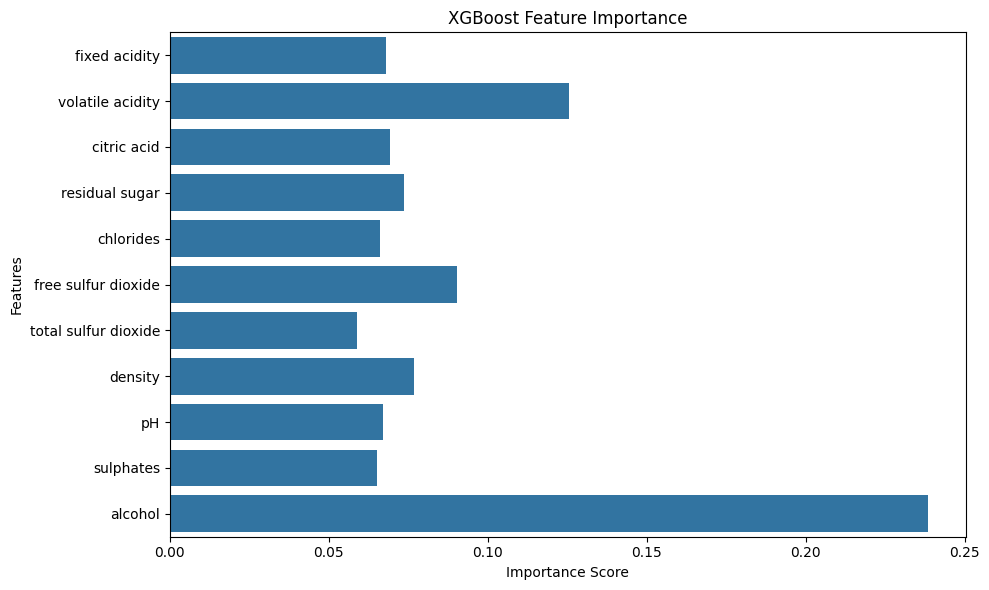

c:\Users\NANAYAW\anaconda3\envs\ML-env\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
c:\Users\NANAYAW\anaconda3\envs\ML-env\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn


Cross-Validation Scores: [nan nan nan nan nan]
Mean CV Score: nan
Standard Deviation: nan

--- Gradient Boosting Analysis ---
Gradient Boosting Classifier Results:
Accuracy: 0.6183673469387755

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.52      0.36      0.43        33
           2       0.64      0.57      0.60       291
           3       0.60      0.75      0.67       440
           4       0.62      0.44      0.52       176
           5       0.86      0.51      0.64        35
           6       0.00      0.00      0.00         1

    accuracy                           0.62       980
   macro avg       0.46      0.38      0.41       980
weighted avg       0.62      0.62      0.61       980



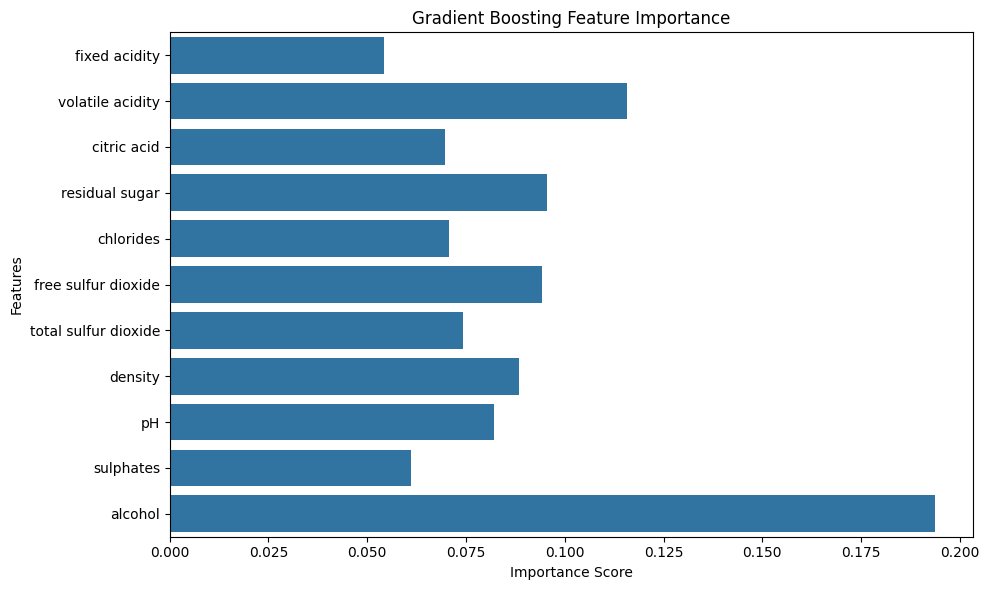

KeyboardInterrupt: 

In [13]:



# Confusion Matrix Plotting
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

# Main execution
def main():
    # XGBoost Analysis
    print("\n--- XGBoost Analysis ---")
    xgb_classifier = xgboost_model(X_train, y_train, X_test, y_test)
    cross_validation_with_pipeline(xgb_classifier, X, y)
    
    # Gradient Boosting Analysis
    print("\n--- Gradient Boosting Analysis ---")
    gb_classifier = gradient_boosting_model(X_train, y_train, X_test, y_test)
    cross_validation_with_pipeline(gb_classifier, X, y)
    
    # Plot confusion matrices
    y_pred_xgb = xgb_classifier.predict(X_test)
    y_pred_gb = gb_classifier.predict(X_test)
    plot_confusion_matrix(y_test, y_pred_xgb, 'XGBoost Confusion Matrix')
    plot_confusion_matrix(y_test, y_pred_gb, 'Gradient Boosting Confusion Matrix')

if __name__ == "__main__":
    main()
